In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sys
from keras.preprocessing.image import ImageDataGenerator 


# Data Pre-processing

### Pre-processing train set (Image augmentation)

In [3]:
# We need to do some specific transformation in train set to avoid overfitting of data

# We'll apply some geometrical transformation like zoom, rotate, horizontal flips etc.
# This is called IMAGE AUGMENTATION
# refer: https://keras.io/api/preprocessing/image/

# ImageDataGenerator class of keras produces realtime batches of augmented images

train_data_generator= ImageDataGenerator(rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True)
                               
train_set = train_data_generator.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# class_mode='binary' because we have binary classes (cat or dog)


Found 8000 images belonging to 2 classes.


### Preprocessing test set 

In [4]:
# We don't want to augment test set. We'll just scale it to 0-1

test_data_generator=ImageDataGenerator(rescale=1./255)
test_set= test_data_generator.flow_from_directory('dataset/test_set',
                              target_size=(64,64),
                              batch_size=32,
                              class_mode='binary')


# dimension of i/p fed to cnn model= (32,64,64,3) 
# (64,64): target size of every image in grayscale
# 3: represents coloured image
# 32: represents no. of images fed at once to the model (batch_size) 

Found 2000 images belonging to 2 classes.


# Building the CNN model

### Initialising the CNN

In [5]:
cnn=tf.keras.models.Sequential()

### Step 1. Convolution 

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))\

# filters= 32: No. of feature detectors for this convolution step.
# kernel_size: dimension of feature detector (here, 3X3)
# input_shape= dimesion of input images
# activation: activation function

### Step2. Max-pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# pool_size: refers to window size on which max-pooling is done (here, (2X2))
# strides: refer to no. of strides to be taken

### Step 3. 2nd Convolution layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, activation='relu'))

### Step 4. 2nd Max-pooling layer

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 5. Flattening: 

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 6. Fully connected layer (ANN)

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# units: no. of neurons for this fully connected ANN layer

### Step 7. Output layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# units=1 because we want only 1 output (either 0 or 1 because dog and cat classes are encoded)
# activation= sigmoid: we are doing binary classification
# activation = softmax: would be used for multi class classification

# Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

### Training the CNN on train set and evaluating on the test set

In [16]:
cnn.fit(x=train_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 34s 134ms/step - loss: 0.6648 - accuracy: 0.5913 - val_loss: 0.5951 - val_accuracy: 0.6815
Epoch 2/25
250/250 [==============================] - 30s 121ms/step - loss: 0.5922 - accuracy: 0.6845 - val_loss: 0.5387 - val_accuracy: 0.7240
Epoch 3/25
250/250 [==============================] - 29s 117ms/step - loss: 0.5620 - accuracy: 0.7079 - val_loss: 0.5611 - val_accuracy: 0.7200
Epoch 4/25
250/250 [==============================] - 29s 117ms/step - loss: 0.5102 - accuracy: 0.7474 - val_loss: 0.4804 - val_accuracy: 0.7765
Epoch 5/25
250/250 [==============================] - 29s 117ms/step - loss: 0.4914 - accuracy: 0.7619 - val_loss: 0.4820 - val_accuracy: 0.7690
Epoch 6/25
250/250 [==============================] - 30s 119ms/step - loss: 0.4714 - accuracy: 0.7697 - val_loss: 0.4683 - val_accuracy: 0.7785
Epoch 7/25
250/250 [==============================] - 29s 118ms/step - loss: 0.4452 - accuracy: 0.7906 - val_loss: 0.4732 - val_ac

# Testing our model

In [20]:
 """we will take a single image and feed it into our model to test if model can correctly 
 predict the class (dog or cat)"""
    
#  refer to: https://keras.io/api/preprocessing/image/ to get all the preprocessing modules and
# methods
import numpy as np
from keras.preprocessing import image
    
test_img= image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64,64)) #loads image in PIL format
    
test_img=image.img_to_array(test_img) #convert PIL format to numpy array
# The dimensions of our test_img is (64,64,3)
# but cnn needs an extra dimension of batch size
# here batch size=1; so we have to add an extra dimension so that final dimension= (1,64,64,3)
test_img=np.expand_dims(test_img, axis=0) #axis=0 means add a dimension in row

result= cnn.predict(test_img/255.0) #normalised value
train_set.class_indices
# dimension of result: (batch_size,1)
""" 0.4,
    1,
    0.56,
    0.89,
    0 """ #here batch size =4
# in our example batch size=1 but result will be 2D

' 0.4,\n   1,\n   0.56,\n   0.89,\n   0 '

In [21]:
if result[0][0]>0.5:
    print("dog")
else:
    print("cat")

dog


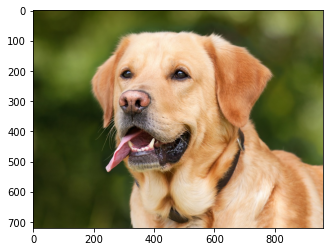

In [23]:
import matplotlib.pyplot as plt
img=plt.imread('dataset/single_prediction/cat_or_dog_1.jpg')
plt.imshow(img)